# Fit against absolute of the FFT of a gaussian

The original data follows a **gaussian distribution**. But this data cannot be observed directly. Instead, the **absolute of the FFT of the data** is observed.

The task at hand is to fit the *observed data* against the model *"absolute of FFT of a gaussian"* to obtain the numerical values of the *parameters of the original data's gaussian distribution*.

## Import stuff

In [19]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import fftpack as fft
import lmfit
import auxiliary

## Define function

In [20]:
def gaussian(x, amp, cen, sig):
    return amp * np.exp(-0.5*((x-cen)/sig)**2)

## Define observation model

In [21]:
# Define model function
def fft_gaussian(x, amp, cen, sig):
    temp = amp * np.exp(-0.5*((x-cen)/sig)**2)
    return np.abs(fft.fftshift(fft.fft(temp)))

# Wrap model function
mod  = lmfit.Model(fft_gaussian)

## 1st version: Without random deviations

### Prepare data to be fitted

In [22]:
# Define true parameters of the gaussian
amp  = 5.
cen  = 38.
sig  = 12.

# Define definition domain
xres = 256
xmin = 0.
xmax = 100.
x    = np.linspace(xmin, xmax, xres, endpoint=False)

# Calculate original data
ori  = gaussian(x, amp, cen, sig)

# Calculate observed data
y    = np.zeros(shape = ori.shape)
y    = ori
y    = fft.fftshift(fft.fft(y))
y    = np.abs(y)

### Perform fit

In [23]:
# Set initial parameters
pars = mod.make_params(amp=amp+1, cen=cen+1, sig=sig-1)

# Fit
res  = mod.fit(y, pars, x=x)

### Show results

[[Model]]
    Model(fft_gaussian)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 256
    # variables        = 3
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -16505.246
    Bayesian info crit = -16494.610
[[Variables]]
    amp:   5          +/- 1.03e-16 (0.00%) (init= 6)
    cen:   38         +/- 3.49e-14 (0.00%) (init= 39)
    sig:   12         +/- 2.86e-16 (0.00%) (init= 11)
[[Correlations]] (unreported correlations are <  0.100)
    C(amp, sig)                  = -0.578 



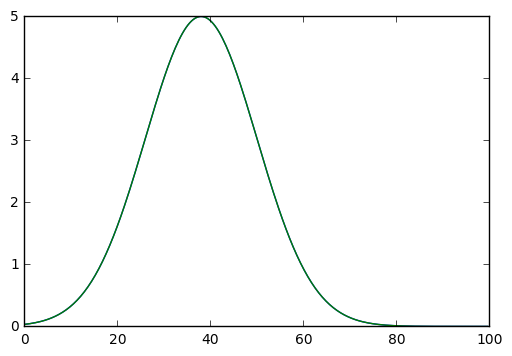

In [24]:
print(res.fit_report())
plt.plot(x, ori)
plt.plot(x, gaussian(x, res.best_values['amp'], res.best_values['cen'], res.best_values['sig']))

## 2nd version: Include random deviations before the FFT

In [25]:
# Define true parameters of the gaussian
amp  = 5.
cen  = 38.
sig  = 12.

# Define definition domain
xres = 256
xmin = 0.
xmax = 100.
x    = np.linspace(xmin, xmax, xres, endpoint=False)

# Define randomness
rCen = 0.
rSig = 1.

# Calculate original data
ori  = gaussian(x, amp, cen, sig)
ori += np.random.normal(rCen, rSig, len(x))

# Calculate observed data
y    = np.zeros(shape = ori.shape)
y    = ori
y    = fft.fftshift(fft.fft(y))
y    = np.abs(y)

### Perform fit

In [26]:
# Set initial parameters
pars = mod.make_params(amp=amp+1, cen=cen+1, sig=sig-1)

# Fit
res  = mod.fit(y, pars, x=x)

### Show results

[[Model]]
    Model(fft_gaussian)
[[Fit Statistics]]
    # function evals   = 57
    # data points      = 256
    # variables        = 3
    chi-square         = 46106.971
    reduced chi-square = 182.241
    Akaike info crit   = 1335.547
    Bayesian info crit = 1346.182
[[Variables]]
    amp:   4.67606592 +/- 0.142676 (3.05%) (init= 6)
    cen:   11.2877615 +/- 1.680079 (14.88%) (init= 39)
    sig:   16.9348141 +/- 1.322490 (7.81%) (init= 11)
[[Correlations]] (unreported correlations are <  0.100)
    C(cen, sig)                  = -0.678 
    C(amp, sig)                  = -0.436 



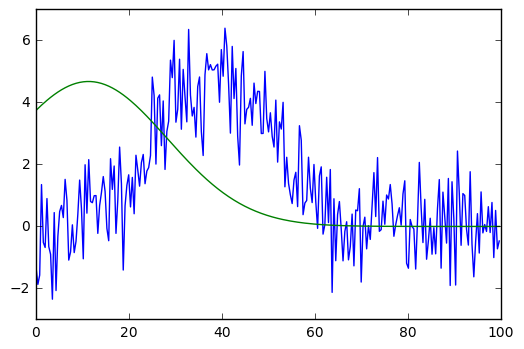

In [27]:
print(res.fit_report())
plt.plot(x, ori)
plt.plot(x, gaussian(x, res.best_values['amp'], res.best_values['cen'], res.best_values['sig']))

## 3rd version: Include random deviations after taking the absolute of the FFT

In [28]:
# Define true parameters of the gaussian
amp  = 5.
cen  = 38.
sig  = 12.

# Define definition domain
xres = 256
xmin = 0.
xmax = 100.
x    = np.linspace(xmin, xmax, xres, endpoint=False)

# Define randomness
rCen = 0.
rSig = 1.

# Calculate original data
ori  = gaussian(x, amp, cen, sig)

# Calculate observed data
y    = np.zeros(shape = ori.shape)
y    = ori
y    = fft.fftshift(fft.fft(y))
y    = np.abs(y)
y   += np.random.normal(rCen, rSig, len(x))

### Perform fit

In [29]:
# Set initial parameters
pars = mod.make_params(amp=amp+1, cen=cen+1, sig=sig-1)

# Fit
res  = mod.fit(y, pars, x=x)

### Show results

[[Model]]
    Model(fft_gaussian)
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 256
    # variables        = 3
    chi-square         = 272.737
    reduced chi-square = 1.078
    Akaike info crit   = 22.212
    Bayesian info crit = 32.848
[[Variables]]
    amp:   4.98119872 +/- 0.010755 (0.22%) (init= 6)
    cen:   63.3529486 +/- 2.259071 (3.57%) (init= 39)
    sig:   12.0534966 +/- 0.030115 (0.25%) (init= 11)
[[Correlations]] (unreported correlations are <  0.100)
    C(amp, sig)                  = -0.578 



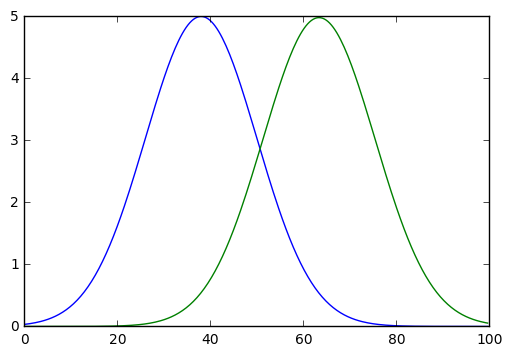

In [30]:
print(res.fit_report())
plt.plot(x, ori)
plt.plot(x, gaussian(x, res.best_values['amp'], res.best_values['cen'], res.best_values['sig']))